<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_Python_new/blob/master/Regressione_Lineare_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive in Runtime Machine**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---


**Install Libraries**

In [0]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe



---
---


**Import Libraries**

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

#Python API for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gs=gspread.authorize(GoogleCredentials.get_application_default())



---
---
**Load GoogleSheet dataset into a dataFrame**

In [0]:
FILE_NAME='Regressione_Lineare_Multipla_IN'
wks=gs.open(FILE_NAME).sheet1
#datafram with all data
INPUT_df=get_as_dataframe(wks)

#remove all NaN
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0:2]
np_IN_Y=np_IN[:,2]
#print('dim',np_IN_X.size,'\n',np_IN_X,'\ndim',np_IN_Y.size,'\n',np_IN_Y)




---

---

Machine Learning

**ALGORITMO DI REGRESSIONE LINEARE MULTIPLA**



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_Y,test_size=0.25)
#print('dim TRAIN',X_train.size,'\n',X_train,'\ndim TEST',X_test.size,'\n',X_test)


---
---
**PreProcess features**


In [0]:
#con più features dobbiamo essere sicuri che queste siano comprese 
#in un range di valori comune, per far questo abbiamo due possibilità:
#Normalizzazione: portiamo tutti i dati in un range compreso tra 0 e 1
#Standardizzazione: convertiamo i dati in una distribuzione normale 
#con media 0 e deviazione standard 1.

#normalize


#stardadize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)


In [54]:

#train the linear regressor
reg = LinearRegression().fit(X_train_ss, y_train)

#y_pred is a linear prediction of X_test
y_pred_test=reg.predict(X_test_ss)
y_pred_train=reg.predict(X_train_ss)

#evaluate the model by using R=1-RSE and MSE
R2=reg.score(X_test_ss,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=reg.score(X_train_ss,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)


TEST
R^2= 0.5368577050085427 
MSE= 769445508.280935 

TRAIN
R^2= 0.4958449486150365 
MSE= 806867876.639038 



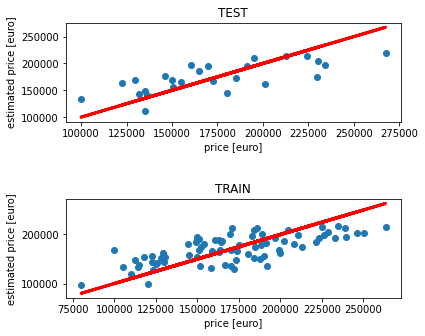

In [55]:
#show the solution
fig, axs = plt.subplots(2,1)

pos0=axs[0].get_position()
pos0_new=[pos0.x0,pos0.y0+0.2,pos0.width,pos0.height]
axs[0].set_position(pos0_new)
axs[0].set_xlabel('price [euro]')
axs[0].set_ylabel('estimated price [euro]')
axs[0].set_title('TEST')
axs[0].scatter(y_test,y_pred_test)
axs[0].plot(y_test,y_test,c='red',linewidth=3)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('price [euro]')
axs[1].set_ylabel('estimated price [euro]')
axs[1].scatter(y_train,y_pred_train)
axs[1].plot(y_train,y_train,c='red',linewidth=3)

#axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)